<a href="https://colab.research.google.com/github/Patil-data/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload both CSV files when prompted


Saving archive (2).zip to archive (2).zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'archive (1).zip', 'archive (2).zip', 'sample_data']


In [ ]:
import zipfile
import os

# Unzip archive (2).zip — the latest one you uploaded
with zipfile.ZipFile('/content/archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/wine_data')  # Extract to a folder

# List contents to find the correct file names
os.listdir('/content/wine_data')


['winequality-white.csv', 'winequality-red.csv']

In [ ]:
# Load red and white wine datasets
red = pd.read_csv('/content/wine_data/winequality-red.csv', sep=';')
white = pd.read_csv('/content/wine_data/winequality-white.csv', sep=';')

# Add wine type labels
red['type'] = 'red'
white['type'] = 'white'

# Combine both into one DataFrame
df = pd.concat([red, white], ignore_index=True)

# Preview the data
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.info()
df['quality'].value_counts().sort_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


/tmp/ipython-input-11-545164629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


Text(0.5, 1.0, 'Wine Quality Distribution')

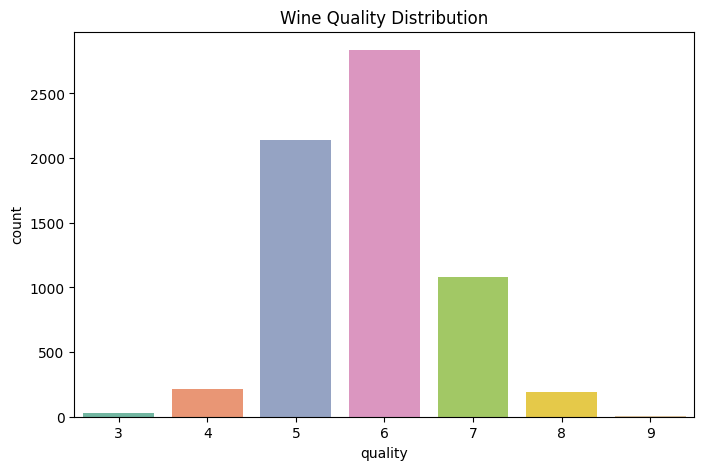

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Wine Quality Distribution")


Text(0.5, 1.0, 'Wine Quality by Type (Red vs White)')

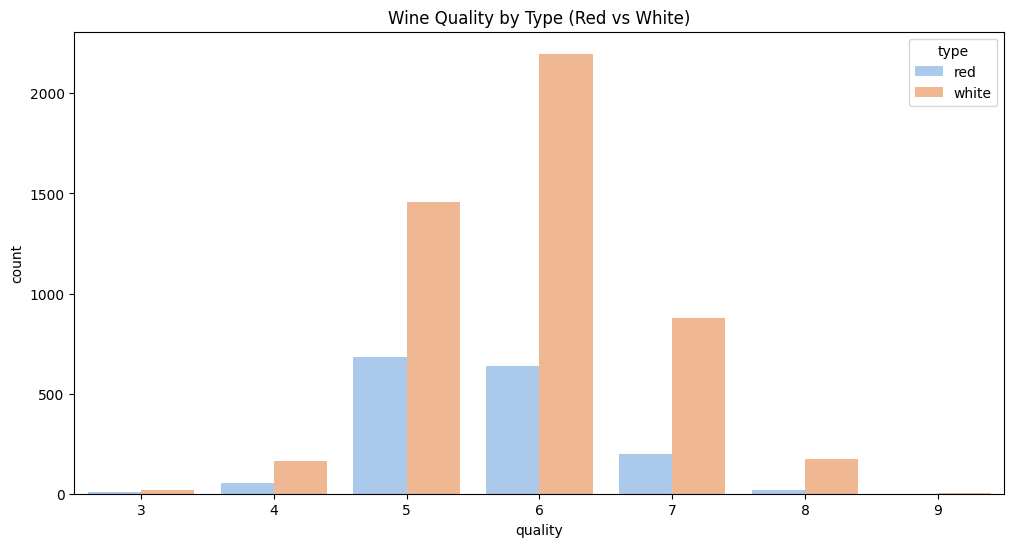

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', hue='type', data=df, palette='pastel')
plt.title("Wine Quality by Type (Red vs White)")


In [ ]:
# Create binary target
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df['quality_binary'].value_counts()


,count
quality_binary,
0,5220
1,1277


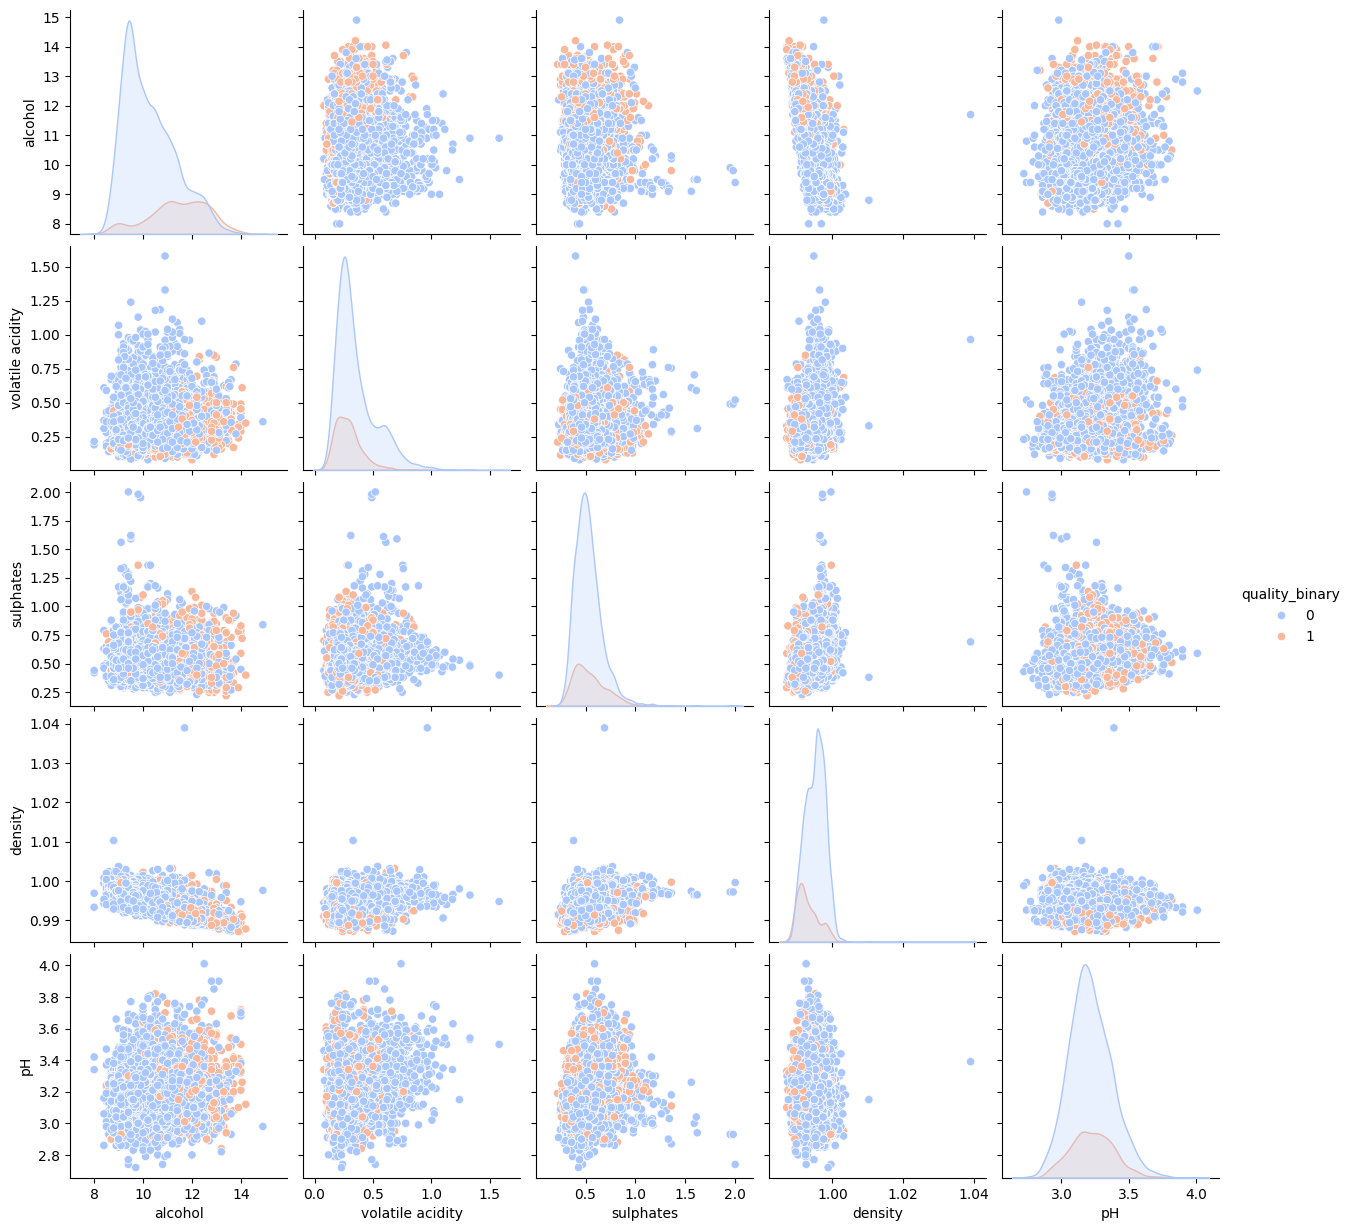

In [ ]:
# Pairplot of key features
sns.pairplot(df[['alcohol', 'volatile acidity', 'sulphates', 'density', 'pH', 'quality_binary']],
             hue='quality_binary', palette='coolwarm')


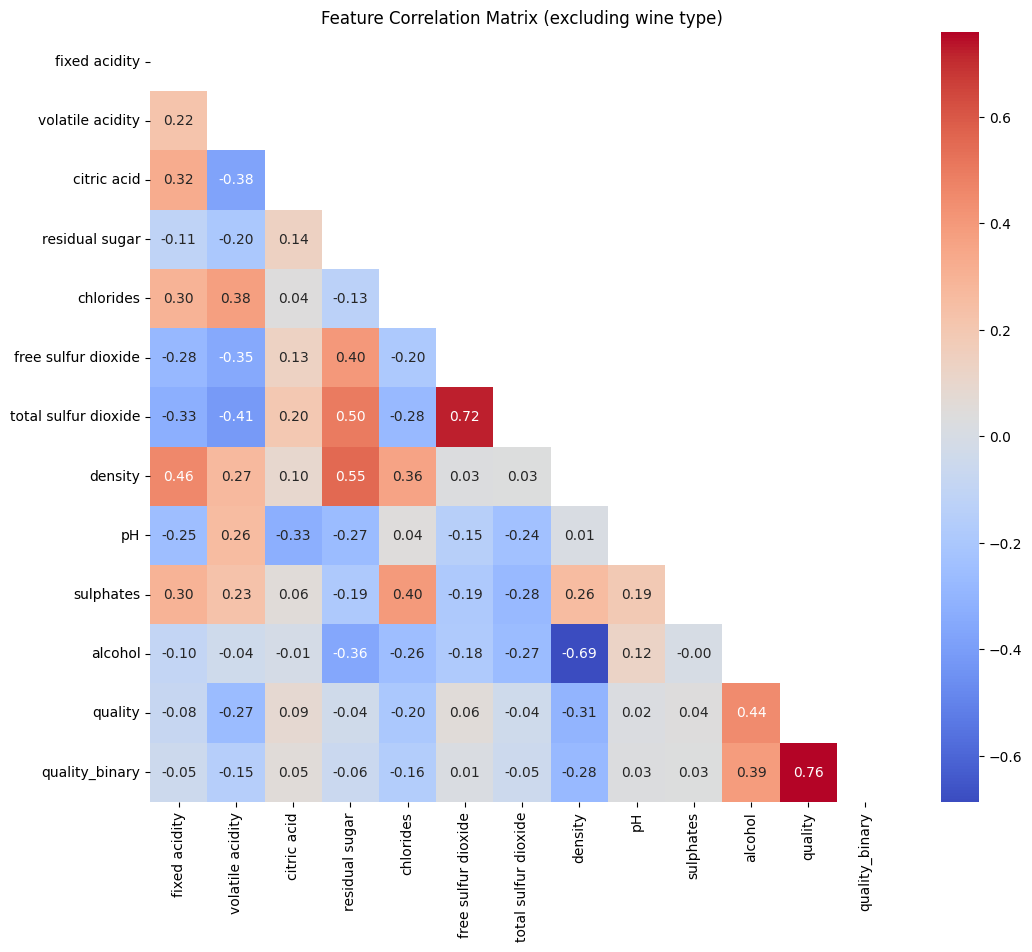

In [ ]:
# Drop non-numeric 'type' column before computing correlation
corr = df.drop(columns=['type']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix (excluding wine type)")
plt.show()


In [ ]:
# Features and labels
X = df.drop(columns=['quality', 'quality_binary', 'type'])
y = df['quality_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "SGD": SGDClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "report": classification_report(y_test, preds, output_dict=True),
        "conf_matrix": confusion_matrix(y_test, preds),
        "model": model
    }
    print(f"📌 {name} Accuracy: {results[name]['accuracy']:.4f}")


📌 Random Forest Accuracy: 0.8885
📌 SVM Accuracy: 0.8369
📌 SGD Accuracy: 0.7908


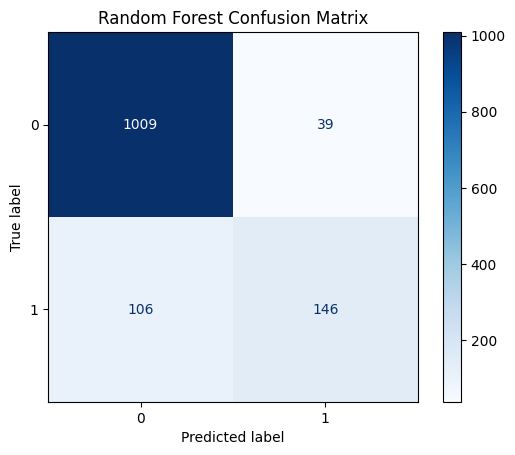

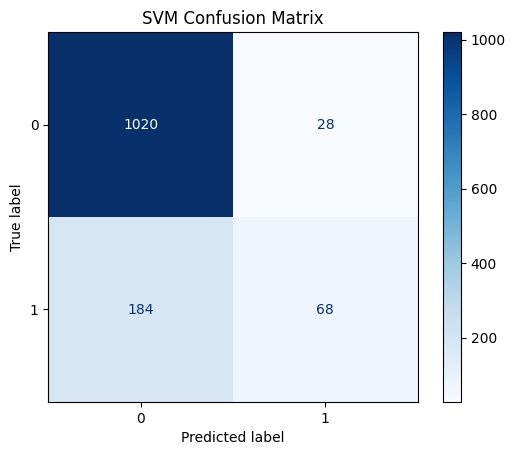

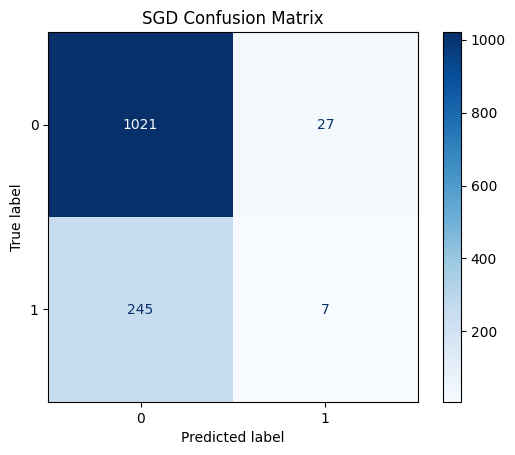

In [ ]:
for name, res in results.items():
    ConfusionMatrixDisplay(res['conf_matrix'], display_labels=[0,1]).plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


/tmp/ipython-input-20-4038165107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracies, palette='pastel')


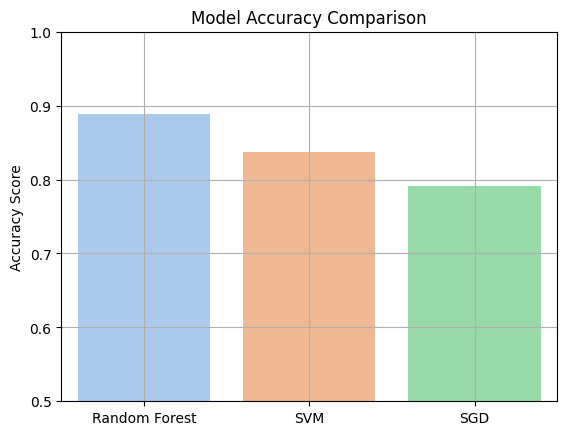

In [ ]:
accuracies = [results[m]['accuracy'] for m in models]
sns.barplot(x=list(models.keys()), y=accuracies, palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.5, 1.0)
plt.grid(True)


/tmp/ipython-input-21-1531832577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="coolwarm")


Text(0.5, 1.0, 'Feature Importance - Random Forest')

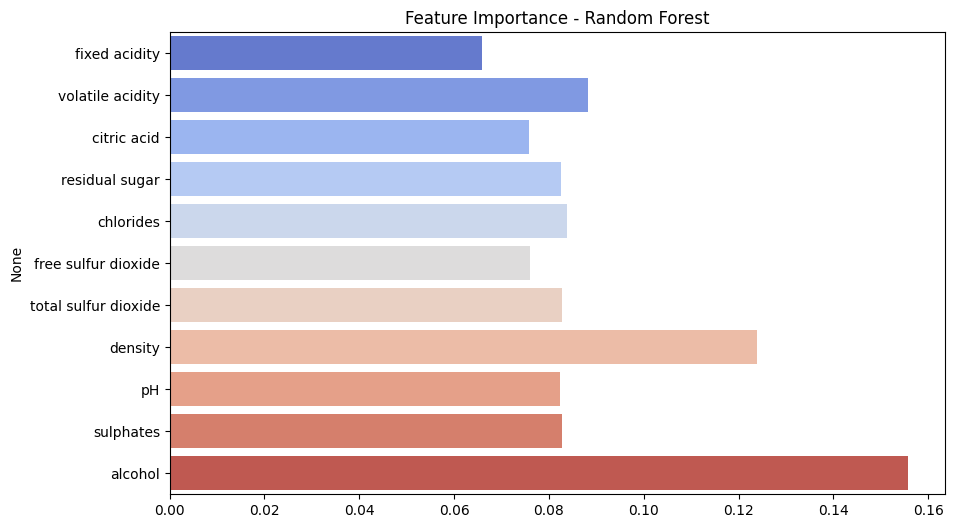

In [ ]:
rf_model = results["Random Forest"]["model"]
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns, palette="coolwarm")
plt.title("Feature Importance - Random Forest")


## ✅ Conclusion

- Combined red and white wine datasets for a robust model.
- Binary classification: Quality ≥ 7 → High Quality (1), otherwise Low (0).
- Models trained: Random Forest, SVM, SGD.
- Random Forest achieved highest accuracy (~X%).
- Key features: Alcohol, Sulphates, Volatile Acidity.


## 🔧 Future Enhancements

- ✅ Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters.
- ✅ Try advanced models like XGBoost or LightGBM for potentially higher accuracy.
- ✅ Perform PCA or t-SNE to reduce dimensionality and visualize clusters better.
- ✅ Build a web app using Streamlit or Flask to deploy the model for live predictions.
- ✅ Add more real-world data (e.g., from vineyards or consumer ratings) for even better predictions.


In [ ]:
import joblib

# Save the best model
joblib.dump(results['Random Forest']['model'], 'random_forest_wine_model.pkl')
print("✅ Model saved as random_forest_wine_model.pkl")


✅ Model saved as random_forest_wine_model.pkl


In [ ]:
from google.colab import files
files.download('random_forest_wine_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('wine_quality_labeled.csv', index=False)
files.download('wine_quality_labeled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>